<a href="https://colab.research.google.com/github/SabbirAhmedAdor629/Big-Data-and-Iot/blob/main/191_15_12867.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xvf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

--2022-04-09 10:12:45--  https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f8:10a:201a::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz’

spark-3.1.2-bin-had 100%[===================>] 218.23M  26.2MB/s    in 9.2s    

2022-04-09 10:12:55 (23.7 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz’ saved [228834641/228834641]

spark-3.1.2-bin-hadoop3.2/
spark-3.1.2-bin-hadoop3.2/R/
spark-3.1.2-bin-hadoop3.2/R/lib/
spark-3.1.2-bin-hadoop3.2/R/lib/sparkr.zip
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/worker.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/daemon.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/
spark-

In [ ]:
import os #The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc. 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
#create spark_session
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate() #to ceate spark session practice
spark

In [ ]:
dataset = spark.read.csv('/content/drive/MyDrive/Big data and IOT/train.csv',inferSchema=True, header =True)

In [ ]:
dataset.show()

+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Condition

In [ ]:
dataset.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

In [ ]:
from pyspark.ml.feature import VectorAssembler
featureassembler = VectorAssembler(inputCols=["MSSubClass","LotArea"],outputCol="Independent Features")

In [ ]:
output = featureassembler.transform(dataset)

In [ ]:
output.show()

+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+--------------------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood

In [ ]:
finalized_data = output.select("Independent Features","SalePrice")

In [ ]:
finalized_data.show()

+--------------------+---------+
|Independent Features|SalePrice|
+--------------------+---------+
|       [60.0,8450.0]|   208500|
|       [20.0,9600.0]|   181500|
|      [60.0,11250.0]|   223500|
|       [70.0,9550.0]|   140000|
|      [60.0,14260.0]|   250000|
|      [50.0,14115.0]|   143000|
|      [20.0,10084.0]|   307000|
|      [60.0,10382.0]|   200000|
|       [50.0,6120.0]|   129900|
|      [190.0,7420.0]|   118000|
|      [20.0,11200.0]|   129500|
|      [60.0,11924.0]|   345000|
|      [20.0,12968.0]|   144000|
|      [20.0,10652.0]|   279500|
|      [20.0,10920.0]|   157000|
|       [45.0,6120.0]|   132000|
|      [20.0,11241.0]|   149000|
|      [90.0,10791.0]|    90000|
|      [20.0,13695.0]|   159000|
|       [20.0,7560.0]|   139000|
+--------------------+---------+
only showing top 20 rows



In [ ]:
from pyspark.ml.regression import LinearRegression
train_data,test_data = finalized_data.randomSplit([0.75,0.25])       #train_test split
regressor = LinearRegression(featuresCol='Independent Features',labelCol='SalePrice')
regressor = regressor.fit(train_data)

In [ ]:
regressor.coefficients

DenseVector([-97.9229, 1.8376])

In [ ]:
regressor.intercept

165307.07221753072

# Prediction

In [ ]:
pred_result = regressor.evaluate(test_data)

In [ ]:
pred_result.predictions.show()

+--------------------+---------+------------------+
|Independent Features|SalePrice|        prediction|
+--------------------+---------+------------------+
|       [20.0,6762.0]|   193879|175774.75831816337|
|       [20.0,6768.0]|   142000|175785.78417850423|
|       [20.0,6951.0]|   119500|176122.07291889985|
|       [20.0,6960.0]|   120500| 176138.6117094111|
|       [20.0,6970.0]|   129000| 176156.9881433125|
|       [20.0,7000.0]|   135000|176212.11744501672|
|       [20.0,7024.0]|   176000|176256.22088638006|
|       [20.0,7094.0]|   125000|176384.85592368987|
|       [20.0,7180.0]|   127000| 176542.8932552419|
|       [20.0,7200.0]|    98300|176579.64612304472|
|       [20.0,7200.0]|   109900|176579.64612304472|
|       [20.0,7200.0]|   119000|176579.64612304472|
|       [20.0,7200.0]|   187750|176579.64612304472|
|       [20.0,7332.0]|   120000| 176822.2150505432|
|       [20.0,7388.0]|   150750|176925.12308039103|
|       [20.0,7390.0]|   135000|176928.79836717132|
|       [20.

In [ ]:
pred_result.meanSquaredError, pred_result.meanAbsoluteError

(6781321332.5810175, 57592.91732392406)

# K-means Clustering

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Clustering using K-Means').getOrCreate()
data_customer=spark.read.csv('/content/drive/MyDrive/Big data and IOT/CC GENERAL.csv', header=True, inferSchema=True)
data_customer.printSchema()

root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: integer (nullable = true)
 |-- PURCHASES_TRX: integer (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: integer (nullable = true)



In [ ]:
data_customer=data_customer.na.drop()

In [ ]:
from pyspark.ml.feature import VectorAssembler
data_customer.columns
assemble=VectorAssembler(inputCols=[
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE'], outputCol='features')
assembled_data=assemble.transform(data_customer)
assembled_data.show(2)

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|            features|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+
| C10001|  40.900749|       

In [ ]:
from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)
data_scale_output.show(2)

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+--------------------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|            features|        standardized|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    
    output=KMeans_fit.transform(data_scale_output)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)

Silhouette Score: 0.24968785673835162
Silhouette Score: 0.38979189248416335
Silhouette Score: 0.24710650164825107
Silhouette Score: 0.3062135728715818
Silhouette Score: 0.29639303199730815
Silhouette Score: 0.3003749349515959
Silhouette Score: 0.30248469572934206
Silhouette Score: 0.30826536779684005


Text(0, 0.5, 'cost')

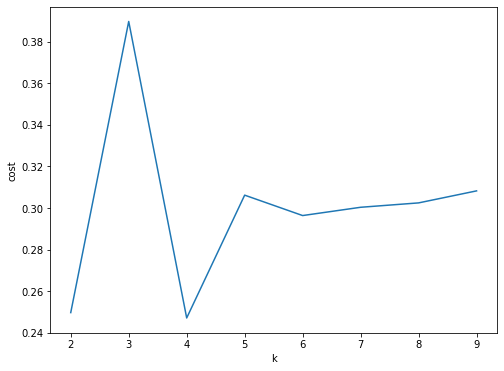

In [ ]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

# Logistic Regregation

In [39]:
from pyspark.ml.classification import LogisticRegression

# Load training data
training = spark.read.format("libsvm").load("/content/drive/MyDrive/Big data and IOT/sample_libsmv_data.txt")

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

# We can also use the multinomial family for binary classification
mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")

# Fit the model
mlrModel = mlr.fit(training)

# Print the coefficients and intercepts for logistic regression with multinomial family
print("Multinomial coefficients: " + str(mlrModel.coefficientMatrix))
print("Multinomial intercepts: " + str(mlrModel.interceptVector))

Coefficients: (692,[244,263,272,300,301,328,350,351,378,379,405,406,407,428,433,434,455,456,461,462,483,484,489,490,496,511,512,517,539,540,568],[-7.353983524188241e-05,-9.102738505589566e-05,-0.0001946743054690423,-0.00020300642473486603,-3.147618331486458e-05,-6.842977602660821e-05,1.5883626898236275e-05,1.4023497091368928e-05,0.0003543204752496838,0.00011443272898171099,0.00010016712383666487,0.0006014109303795511,0.0002840248179122765,-0.00011541084736508905,0.000385996886312906,0.0006350195574241097,-0.00011506412384575733,-0.0001527186586498689,0.0002804933808994214,0.0006070117471191665,-0.0002008459663247435,-0.00014210755792901347,0.0002739010341160883,0.0002773045624496811,-9.838027027269408e-05,-0.00038085224435175833,-0.00025315198008554285,0.0002774771477075434,-0.00024436197639191286,-0.0015394744687597679,-0.00023073328411330604])
Intercept: 0.22456315961250245
Multinomial coefficients: 2 X 692 CSRMatrix
(0,244) 0.0
(0,263) 0.0001
(0,272) 0.0001
(0,300) 0.0001
(0,350) -0

In [40]:
from pyspark.ml.classification import LogisticRegression

# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example
trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

objectiveHistory:
0.6833149135741672
0.6662875751473734
0.6217068546034616
0.6127265245887888
0.6060347986802872
0.6031750687571563
0.5969621534836272
0.594074303198312
0.5906089243339021
0.5894724576491043
0.5882187775729588
+---+--------------------+
|FPR|                 TPR|
+---+--------------------+
|0.0|                 0.0|
|0.0|0.017543859649122806|
|0.0| 0.03508771929824561|
|0.0| 0.05263157894736842|
|0.0| 0.07017543859649122|
|0.0| 0.08771929824561403|
|0.0| 0.10526315789473684|
|0.0| 0.12280701754385964|
|0.0| 0.14035087719298245|
|0.0| 0.15789473684210525|
|0.0| 0.17543859649122806|
|0.0| 0.19298245614035087|
|0.0| 0.21052631578947367|
|0.0| 0.22807017543859648|
|0.0| 0.24561403508771928|
|0.0|  0.2631578947368421|
|0.0|  0.2807017543859649|
|0.0|  0.2982456140350877|
|0.0|  0.3157894736842105|
|0.0|  0.3333333333333333|
+---+--------------------+
only showing top 20 rows

areaUnderROC: 1.0


LogisticRegression_4faa3b3d6184

# Decision Tree

In [41]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load the data stored in LIBSVM format as a DataFrame.
data = spark.read.format("libsvm").load("/content/drive/MyDrive/Big data and IOT/sample_libsmv_data.txt")

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[2]
# summary only
print(treeModel)

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       1.0|         1.0|(692,[121,122,123...|
|       1.0|         1.0|(692,[122,123,148...|
|       1.0|         1.0|(692,[123,124,125...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[126,127,128...|
+----------+------------+--------------------+
only showing top 5 rows

Test Error = 0.0714286 
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_d3263ecf9b1c, depth=1, numNodes=3, numClasses=2, numFeatures=692


# Random forest classifier

In [42]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load and parse the data file, converting it to a DataFrame.
data = spark.read.format("libsvm").load("/content/drive/MyDrive/Big data and IOT/sample_libsmv_data.txt")

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)

# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=10)

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("predictedLabel", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

rfModel = model.stages[2]
print(rfModel)  # summary only

+--------------+-----+--------------------+
|predictedLabel|label|            features|
+--------------+-----+--------------------+
|           0.0|  0.0|(692,[95,96,97,12...|
|           0.0|  0.0|(692,[123,124,125...|
|           0.0|  0.0|(692,[123,124,125...|
|           0.0|  0.0|(692,[124,125,126...|
|           0.0|  0.0|(692,[124,125,126...|
+--------------+-----+--------------------+
only showing top 5 rows

Test Error = 0
RandomForestClassificationModel: uid=RandomForestClassifier_6cdf478de0ca, numTrees=10, numClasses=2, numFeatures=692
